Success! The plots have been generated and saved.


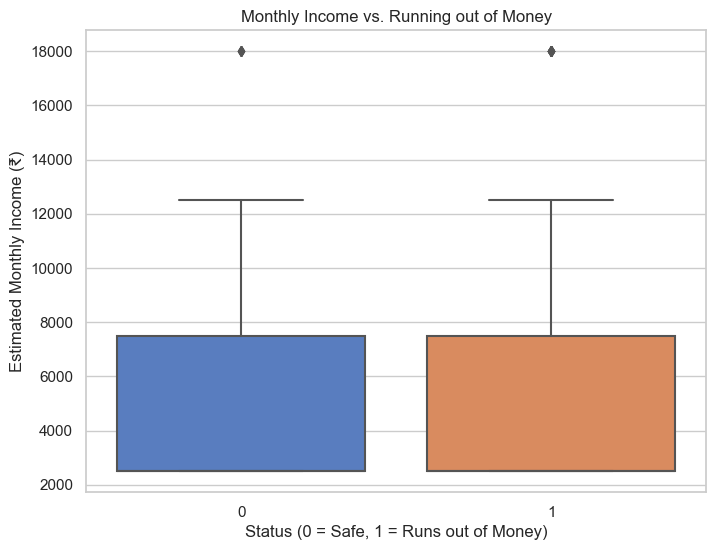

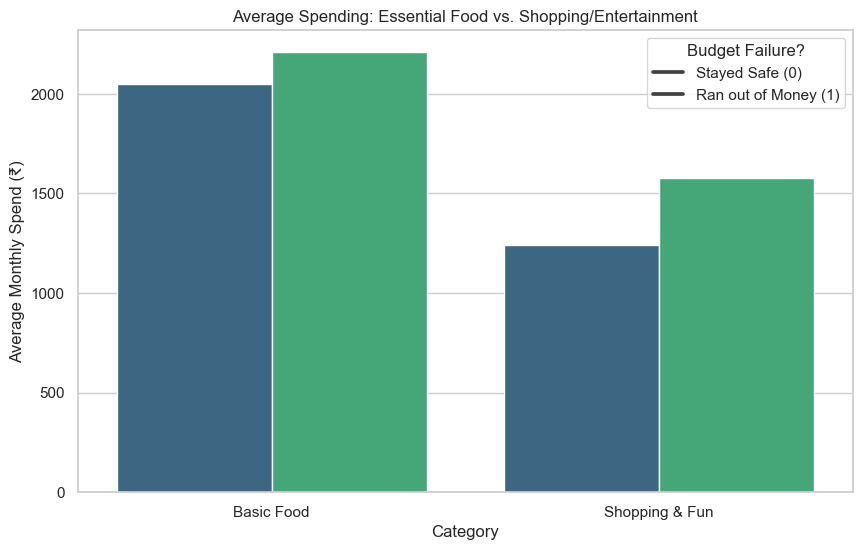

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
analysis_df = pd.read_csv('cleaned_student_data.csv')

# Use a clean style
sns.set_theme(style="whitegrid")

# --- VISUAL 1: Income Analysis ---
plt.figure(figsize=(8, 6))
# Convert target to string so the legend doesn't crash
analysis_df['target_str'] = analysis_df['target'].astype(str)

sns.boxplot(
    x='target_str', 
    y='2. What is your average monthly income or allowance? ', 
    data=analysis_df, 
    palette='muted'
)
plt.title('Monthly Income vs. Running out of Money')
plt.xlabel('Status (0 = Safe, 1 = Runs out of Money)')
plt.ylabel('Estimated Monthly Income (₹)')
plt.savefig('income_analysis.png')

# --- VISUAL 2: Spending Habits (The "Budget Killer" Plot) ---
# Calculate means
habits = analysis_df.groupby('target')[['5. How much do you spend on food per month? ', 
                                       '10. How much do you spend monthly on shopping and entertainment?\n (Clothes, gadgets, movies, games, etc.) ']].mean().reset_index()

# Reshape data
habits_melted = habits.melt(id_vars='target', var_name='Category', value_name='Average_Spend')

# FIX: Convert 'target' to string here as well to prevent the AttributeError
habits_melted['target'] = habits_melted['target'].astype(str)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Category', 
    y='Average_Spend', 
    hue='target', 
    data=habits_melted,
    palette='viridis'
)

plt.title('Average Spending: Essential Food vs. Shopping/Entertainment')
plt.xticks(ticks=[0,1], labels=['Basic Food', 'Shopping & Fun'])
plt.ylabel('Average Monthly Spend (₹)')
plt.legend(title='Budget Failure?', labels=['Stayed Safe (0)', 'Ran out of Money (1)'])
plt.savefig('spending_habits.png')

print("Success! The plots have been generated and saved.")